In [1]:
version = "REPLACE_PACKAGE_VERSION"

# Reinforcement Learning


## Assignment 1: Parking Problem

In this assignment, we will solve the parking problem using stochastic dynamic programming (DP).

### Parking Problem

A student is looking for a parking space on the way to their office. There are $N$ spaces leading up to their office, and a garage at the office. They start at space $0$ and traverse the parking spaces sequentially, i.e. from space $k$ they go next to space $k+1$, and never go back. Each parking space $k$ costs $c_k$, and is available with probability $p_k$ which is independent of whether other parking spaces are available or not. If they reach the last parking space and do not park there or there is no space available, they must park at the garage with cost $C$. The student can observe whether a parking space is available only when they reach it. If it is available, they have two options, either to park or go and check the next space. If it is not available, they could do nothing but go forward. The problem is to find the parking policy that minimizes the expected cost.

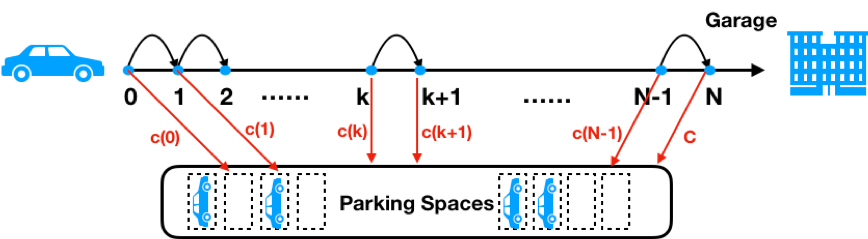


### Problem Formulation

This parking problem can be formulated as a finite horizon stochastic DP problem:

- *Stage $k$*: 

    The stage corresponding to the parking spaces and the garage. Stage $k$ is the time when they reach parking space $k$, for $k=0,...,N-1$. Stage $N$ is the time when they reach the garage.


- *State $x_k$*: 
    
    For $k=0,...,N-1$, state $x_k$ means whether parking space $k$ is available or not.
    
    $x_k=1$: parking space $k$ is available;
    
    $x_k=0$: parking space $k$ is not available.
   
    $x_N=1$ since the garage is always available.
    
    We will also define a terminal state $T$, which means that the student has already parked their vehicle.


- *Action $u_k$*:
       
    For $k=0,...,N-1$,
    
    $u_k=1$: to park at parking space $k$;
    
    $u_k=0$: to continue.
    
    Note that $u_k=0$ when $x_k=0$ because the student has to continue if the parking space is not available,
    and $u_N=1$ since the student has to park at the garage at stage $N$.
    

- *Cost $g_k(x_k,u_k)$*: 

    For $k=0,...,N-1$,

    $g_k(x_k,u_k)=c_k$ if $x_k=1$ and $u_k=1$.
    
    Otherwise, $g_k(x_k,u_k)=0$. 
    
    $g_{N}(x_N, u_N)=C$ is the cost for parking at the garage.
    
    $g_k(T,u_k)=0$ for any $k$ and $u_k$ since $x_k=T$ means that the student has already parked their vehicle.
    
 
- *State Transition*:

    For $k=0,...,N-1$,
    
    $x_0=1$ with probability $p_0$, and $x_0=0$ with probability $1-p_0$;
    
    if $x_k\neq T$ and $u_k=0$, then $x_{k+1}=1$ with probability $p_{k+1}$, and $x_{k+1}=0$ with probability $1-p_{k+1}$;
    
    if $x_k\neq T$ and $u_k=1$, then $x_{k+1}=T$;
    
    if $x_k=T$, then $x_{k+1}=T$.


- *Goal*:

    Minimize the expected total cost $\mathbb{E} \left[ \sum_{k=0}^{N} g_k(x_k, u_k) \right]$.


### Cost-to-go Function

Let $J^*_k(x_k)$ denote the optimal cost-to-go function for state $x_k$ at stage $k$, defined by
$$
J^*_k(x_k) = \min_{\pi} \mathbb{E} \left[ \sum_{j=k}^{N} g_j(x_j, \mu_j(x_j)) \right]
$$

where $\pi=(\mu_0,...,\mu_{N-1})$.


In [2]:
# Import packages. Run this cell.

import numpy as np

### Questions

Our goal is to find an optimal policy that minimizes the expected total cost, i.e.,
$$
\mathop{\mathrm{argmin}}_{\pi} \mathbb{E} \left[ \sum_{k=0}^{N} g_k(x_k, \mu_k(x_k)) \right]
$$

Please answer the following questions.

**1.** Bellman Equation (3 pts) 

(1) Write down the Bellman Equation for $J^*_k(x_k)$, $k=0,\dots,N-1$. Do not leave $g_k$ in your final answer.

Hint: Consider two cases, $x_k=1$ or $x_k=0$.

**Note**: This question will be manually graded.

The Bellman Equation for the optimal cost-to-go function 𝐽∗𝑘(𝑥𝑘) is given by the following:

For 𝑘 = 0,...,𝑁-1:

1) When 𝑥𝑘 = 1 (parking space 𝑘 is available):
𝐽∗𝑘(1) = min {𝑐𝑘 + 𝐽∗(𝑇), 𝑝𝑘+1 𝐽∗𝑘+1(1) + (1-𝑝𝑘+1) 𝐽∗𝑘+1(0)}

In this case, the student has two options:
a) Park at space 𝑘 with cost 𝑐𝑘 and then the cost-to-go is 𝐽∗(𝑇) (since they have already parked).
b) Move to the next space, in which case the expected cost-to-go is 𝑝𝑘+1 𝐽∗𝑘+1(1) + (1-𝑝𝑘+1) 𝐽∗𝑘+1(0), considering the probability that the next space is available or not.

2) When 𝑥𝑘 = 0 (parking space 𝑘 is not available):
𝐽∗𝑘(0) = 𝑝𝑘+1 𝐽∗𝑘+1(1) + (1-𝑝𝑘+1) 𝐽∗𝑘+1

**2.** Backward Computation (4 pts) 

We know that $J^*_{N}(x_{N})=C$ since the student has to park at the garage. Calculate the optimal cost-to-go function backward using the Bellman equation, i.e., compute the values of $J^*_{N-1}(x_{N-1}),...,J^*_{0}(x_{0})$.

Please complete the Python function `backward_cal` in the next cell. The inputs of the function are `N`, `cost`, `prob`, `C`:

   - `N`: an integer greater than or equal to 1. the number of parking spaces, i.e., $N$
 
   - `cost`: a numpy array with size $N$. `cost[k]` is the cost of parking at space $k$, i.e., $c_k$.

   - `prob`: a numpy array with size $N$. `prob[k]` is the probability that the parking space $k$ is available, i.e., $p_k$.

   - `C`: the cost of parking at the garage.
 
The output `cost_to_go` is the cost-to-go function $J^*_{k}(x_{k})$ for $k=0,...,N-1$ and $x_{k}\in \{0, 1\}$:

   - `cost_to_go`: a numpy array with shape `(N, 2)`. `cost_to_go[k, x_k]` is $J^*_{k}(x_{k})$. The precision is up to 4 decimal places.
    
    For example, `cost_to_go[0, 1]` is the cost-to-go at parking space $0$ when the parking space is available, i.e., $J^*_{0}(1)$.

In [3]:
def backward_cal(N, cost, prob, C):
    """
    Calculate the optimal cost-to-go function backward using the Bellman equation
    Args:
        N: an integer greater than or equal to 1. the number of parking spaces.
        cost: a numpy array with size N. cost[k] is the cost of parking at space k, i.e., c_k.
        prob: a numpy array with size N. prob[k] is the probability that the parking space k is available, i.e., p_k.
        C: the cost of parking at the garage.
    Returns:
        cost_to_go: a numpy array with shape (N, 2). cost_to_go[k, x_k] is J^*_{k}(x_{k}).
    """
    cost_to_go = np.zeros((N, 2))
    
    cost_to_go[N-1, 0] = prob[N-1] * C + (1 - prob[N-1]) * C
    cost_to_go[N-1, 1] = min(cost[N-1] + C, prob[N-1] * C + (1 - prob[N-1]) * C)
    
    for k in range(N-2, -1, -1):
        cost_to_go[k, 0] = prob[k+1] * cost_to_go[k+1, 1] + (1 - prob[k+1]) * cost_to_go[k+1, 0]
        park_cost = cost[k] + C
        move_cost = prob[k+1] * cost_to_go[k+1, 1] + (1 - prob[k+1]) * cost_to_go[k+1, 0]
        cost_to_go[k, 1] = min(park_cost, move_cost)
    
    cost_to_go = np.round(cost_to_go, 4)
    
    return cost_to_go

In [4]:
# Sample Test, checking the output of your function backward_cal

# Sample input
N = 3
cost = np.array([0.4, 0.2, 0.1])
prob = np.array([0.5, 0.5, 0.5])
C = 0.4

# Sample output
cost_to_go = np.array([[0.2250, 0.2250],
                       [0.2500, 0.2000],
                       [0.4000, 0.1000]])

# Sample test
func_out = backward_cal(N, cost, prob, C)
for i in range(N):
    for j in range(2):
        assert round(func_out[i, j], 4) == round(cost_to_go[i, j], 4), "Question 2: The sample test failed."


AssertionError: Question 2: The sample test failed.

In [ ]:
# Hidden Test 1, checking the output of your function backward_cal

In [ ]:
# Hidden Test 2, checking the output of your function backward_cal

In [ ]:
# Hidden Test 3, checking the output of your function backward_cal

**3.** Implement the Policy (3 pts)

Assume that we have obtained the optimal cost-to-go function $J^*_{k}(x_{k})$ for $k=0,...,N-1$ and $x_k\in\{0, 1\}$. Then we can implement the policy.
 
Please complete the Python function `policy` in the next cell. This function implements the policy function $\mu_k$, which takes the current state $x_k$ as input and then outputs an action $u_k$.

Inputs:
   - `N`: an integer greater than or equal to 1. the number of parking spaces, i.e., $N$
   
   - `cost`: a numpy array with size $N$. `cost[k]` is the cost of parking at space $k$, i.e., $c_k$.

   - `prob`: a numpy array with size $N$. `prob[k]` is the probability that the parking space $k$ is available, i.e., $p_k$.

   - `C`: the cost of parking at the garage.
   
   - `k`: the stage $k$, i.e., the time when the student reaches parking space $k$.
 
   - `x_k`: the state of the parking space $k$. `x_k = 1` means that the space is available; `x_k = 0` means that the space is not available.

   - `cost_to_go`: a numpy array with shape `(N, 2)`. `cost_to_go[k, x_k]` is $J^*_{k}(x_{k})$.

Output:
   - `u_k`: The action to take. `u_k = 1`: to park here; `u_k = 0`: to continue.


In [ ]:
def policy(N, cost, prob, C, k, x_k, cost_to_go):
    """
    Implement the policy given the current state
    Args:
        N: an integer greater than or equal to 1. the number of parking spaces.
        cost: a numpy array with size N. cost[k] is the cost of parking at space k, i.e., c_k.
        prob: a numpy array with size N. prob[k] is the probability that the parking space k is available, i.e., p_k.
        C: the cost of parking at the garage.
        k: the stage k, i.e., the time when the student reaches parking space k.
        x_k: the state of the parking space k. x_k = 1 means that the space is available; x_k = 0 means that the space is not available.
        cost_to_go: a numpy array with shape (N, 2). cost_to_go[k, x_k] is J^*_{k}(x_{k}).
    Returns:
        u_k: The action to take. u_k = 1: to park here; u_k = 0: to continue.
    """
    #u_k = None
    if x_k == 0:  # If the parking space is not available, the student has to continue, i.e., u_k = 0.
        u_k = 0
    elif x_k == 1:
        u_k = 1
    else:
        park_cost = cost[k] + C
        move_cost = prob[k+1] * cost_to_go[k+1, 1] + (1 - prob[k+1]) * cost_to_go[k+1, 0]
        
        if park_cost <= move_cost:
            u_k = 1
        else:
            u_k = 0
    
    return u_k

In [ ]:
# Sample Test 1, checking the output of your function policy

# Sample input
N = 3
cost = np.array([0.4, 0.2, 0.1])
prob = np.array([0.5, 0.5, 0.5])
C = 0.4
k = 1
x_k = 1
cost_to_go = np.array([[0.2250, 0.2250],
                       [0.2500, 0.2000],
                       [0.4000, 0.1000]])

# Sample output
u_k = 1

# Sample test
func_out = policy(N, cost, prob, C, k, x_k, cost_to_go)
assert func_out == u_k, "Question 3: The sample test 1 failed."

In [ ]:
# Sample Test 2, evaluating the cost averaged over 10000 trials

# Sample input
N = 3
cost = np.array([0.4, 0.2, 0.1])
prob = np.array([0.5, 0.5, 0.5])
C = 0.4
cost_to_go = np.array([[0.2250, 0.2250],
                       [0.2500, 0.2000],
                       [0.4000, 0.1000]])

# Sample test
np.random.seed(0)
cost_rec = 0.0
for trial in range(10000):
    for k in range(N + 1):
        if k == N:
            cost_rec = cost_rec + C
        else:
            if np.random.random() < prob[k]:
                x_k = 1
            else:
                x_k = 0
            if x_k == 1:
                u_k = policy(N, cost, prob, C, k, x_k, cost_to_go)
                if u_k == 1:
                    cost_rec = cost_rec + cost[k]
                    break
print("Cost averaged over 10000 trials: ", cost_rec / 10000)
assert round(cost_rec / 10000, 2) <= 0.23, "Question 3: The sample test 2 failed."

In [ ]:
# Hidden Test 1, checking the output of your function policy

In [ ]:
# Hidden Test 2, evaluating the cost averaged over 10000 trials